In [1]:
import pandas as pd

In [6]:
pol_dia = pd.read_csv("C:\\Users\\kika_\\OneDrive\\Área de Trabalho\\dados\\QualAr-Sp\\pol_dia.csv")

print(pol_dia.head(20))

    Unnamed: 0        Data          Estacao Poluente   Valor
0            0  01/01/2020    Capão Redondo     MP10   28.74
1            1  01/01/2020    Capão Redondo       O3   51.56
2            2  01/01/2020  Cerqueira César       CO  842.17
3            3  01/01/2020  Cerqueira César     MP10   30.09
4            4  01/01/2020  Cerqueira César      NO2   14.55
5            5  01/01/2020  Cerqueira César      SO2    0.48
6            6  01/01/2020        Congonhas       CO  645.53
7            7  01/01/2020        Congonhas      NO2   29.65
8            8  01/01/2020        Congonhas      SO2    1.26
9            9  01/01/2020       Ibirapuera    MP2.5   26.48
10          10  01/01/2020       Interlagos     MP10   37.39
11          11  01/01/2020       Interlagos      NO2   16.36
12          12  01/01/2020       Interlagos       O3   54.09
13          13  01/01/2020       Interlagos      SO2    1.40
14          14  01/01/2020   Itaim Paulista     MP10   45.96
15          15  01/01/20

In [7]:
# Removendo a coluna "Unnamed"

pol_dia.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
pol_dia.describe()

,Valor
count,45604.000000
mean,103.680333
std,235.530603
min,0.000000
25%,14.790000
50%,28.710000
75%,50.670000
max,3696.200000


In [9]:
pol_dia.isnull().sum()

Data        0
Estacao     0
Poluente    0
Valor       0
dtype: int64

In [11]:
## Análise EAD visual

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

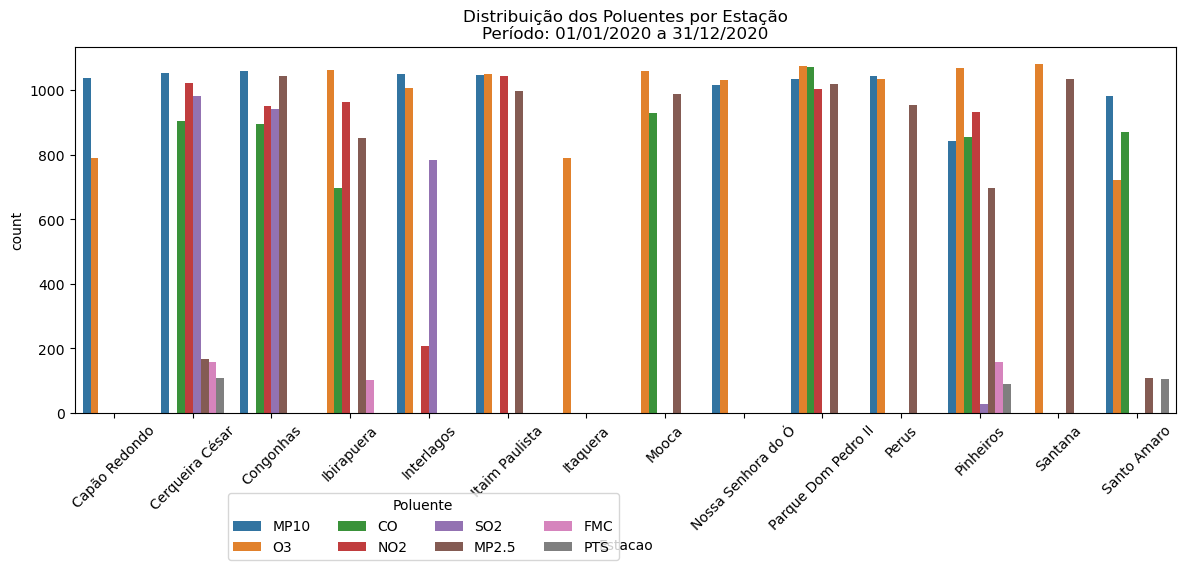

In [26]:
# Estações x poluentes em 1 ano

periodo = '01/01/2020 a 31/12/2020' 

plt.figure(figsize=(12, 6))

sns.countplot(data=pol_dia, x='Estacao', hue='Poluente')
plt.title(f'Distribuição dos Poluentes por Estação\nPeríodo: {periodo}')
plt.xticks(rotation=45)
plt.legend(title='Poluente', bbox_to_anchor=(0.5, -0.2), loc='upper right', ncol=4)
plt.tight_layout()  
plt.show()



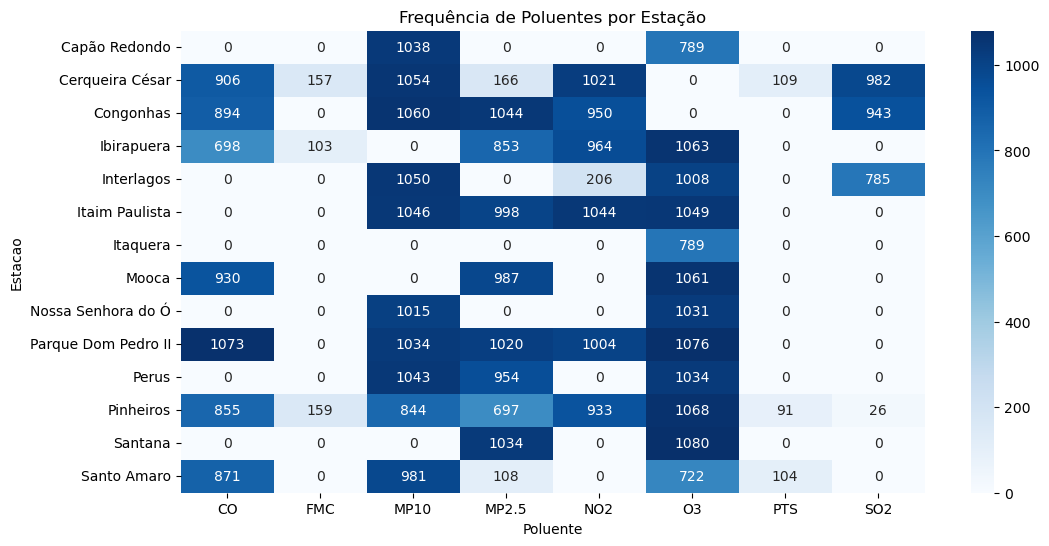

In [31]:
# Tabela de frequências entre Estação x Poluente

tabela_frequencias = pd.crosstab(pol_dia['Estacao'], pol_dia['Poluente'])

# Mapa de calor com a tabela de frequências

plt.figure(figsize=(12, 6))
sns.heatmap(tabela_frequencias, annot=True, cmap='Blues', fmt='d')
plt.title('Frequência de Poluentes por Estação')
plt.show()

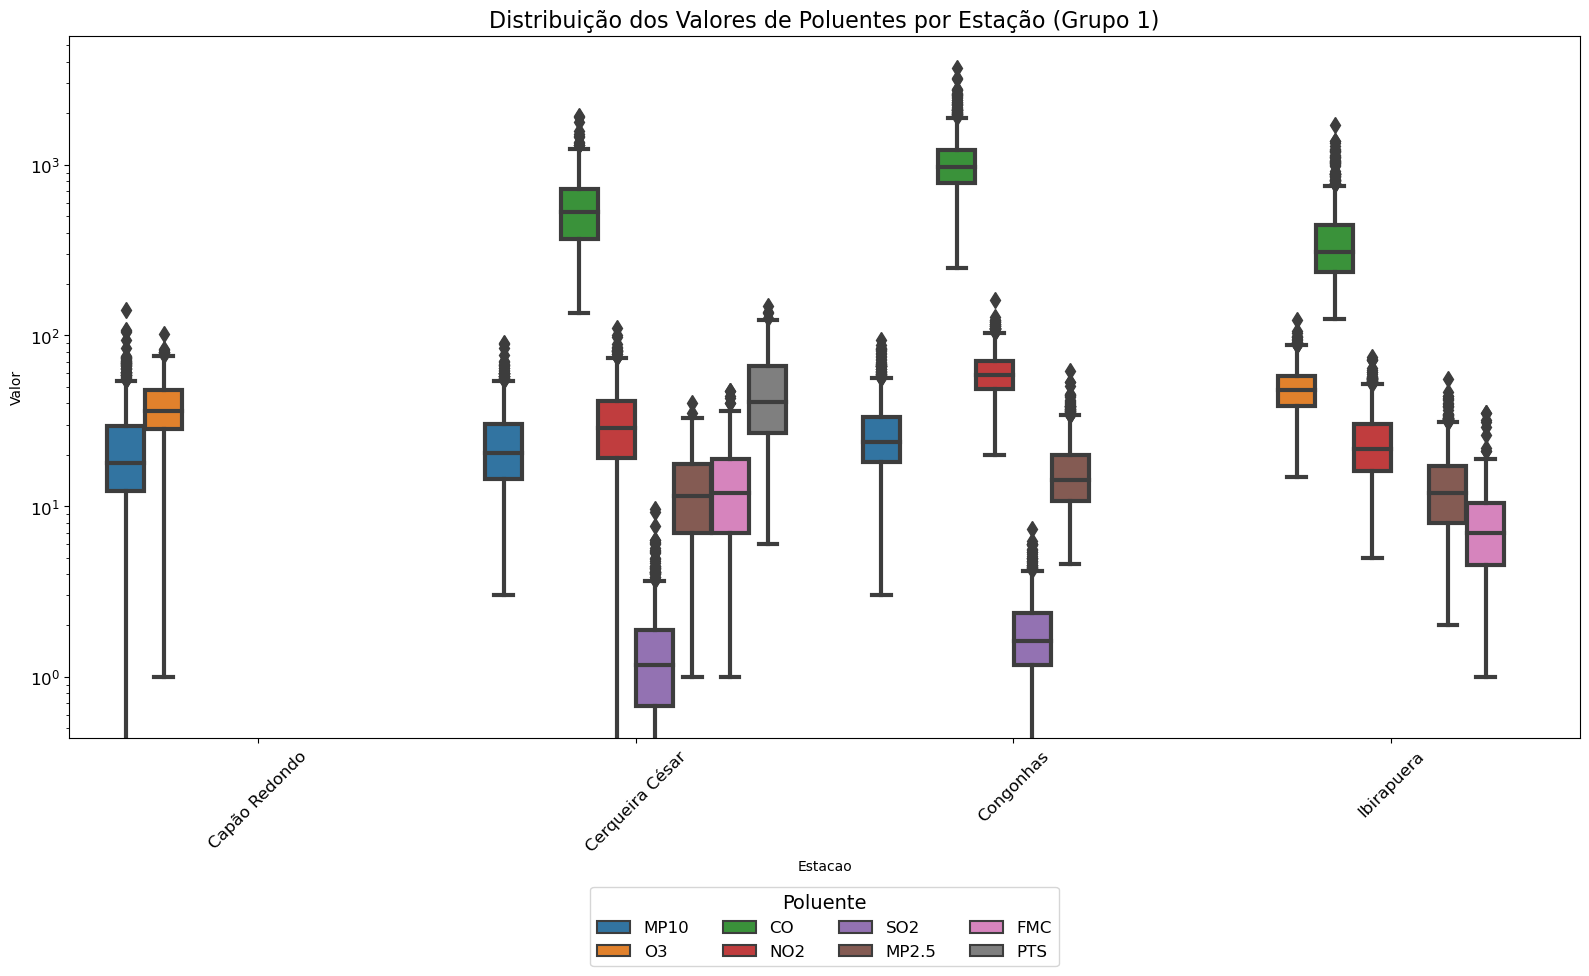

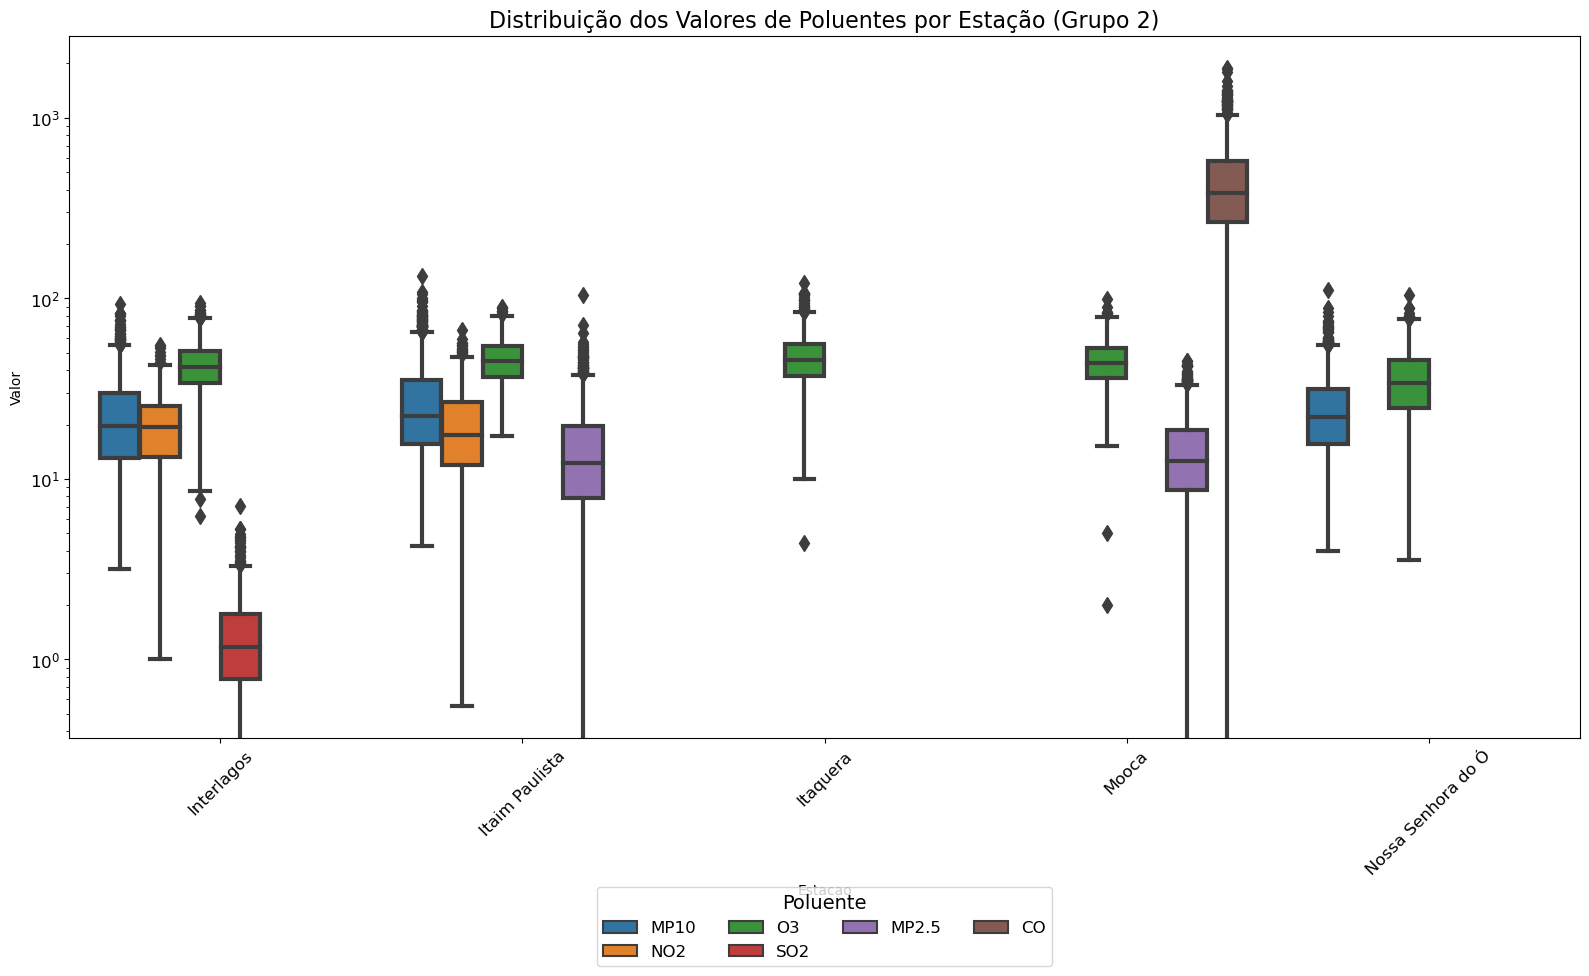

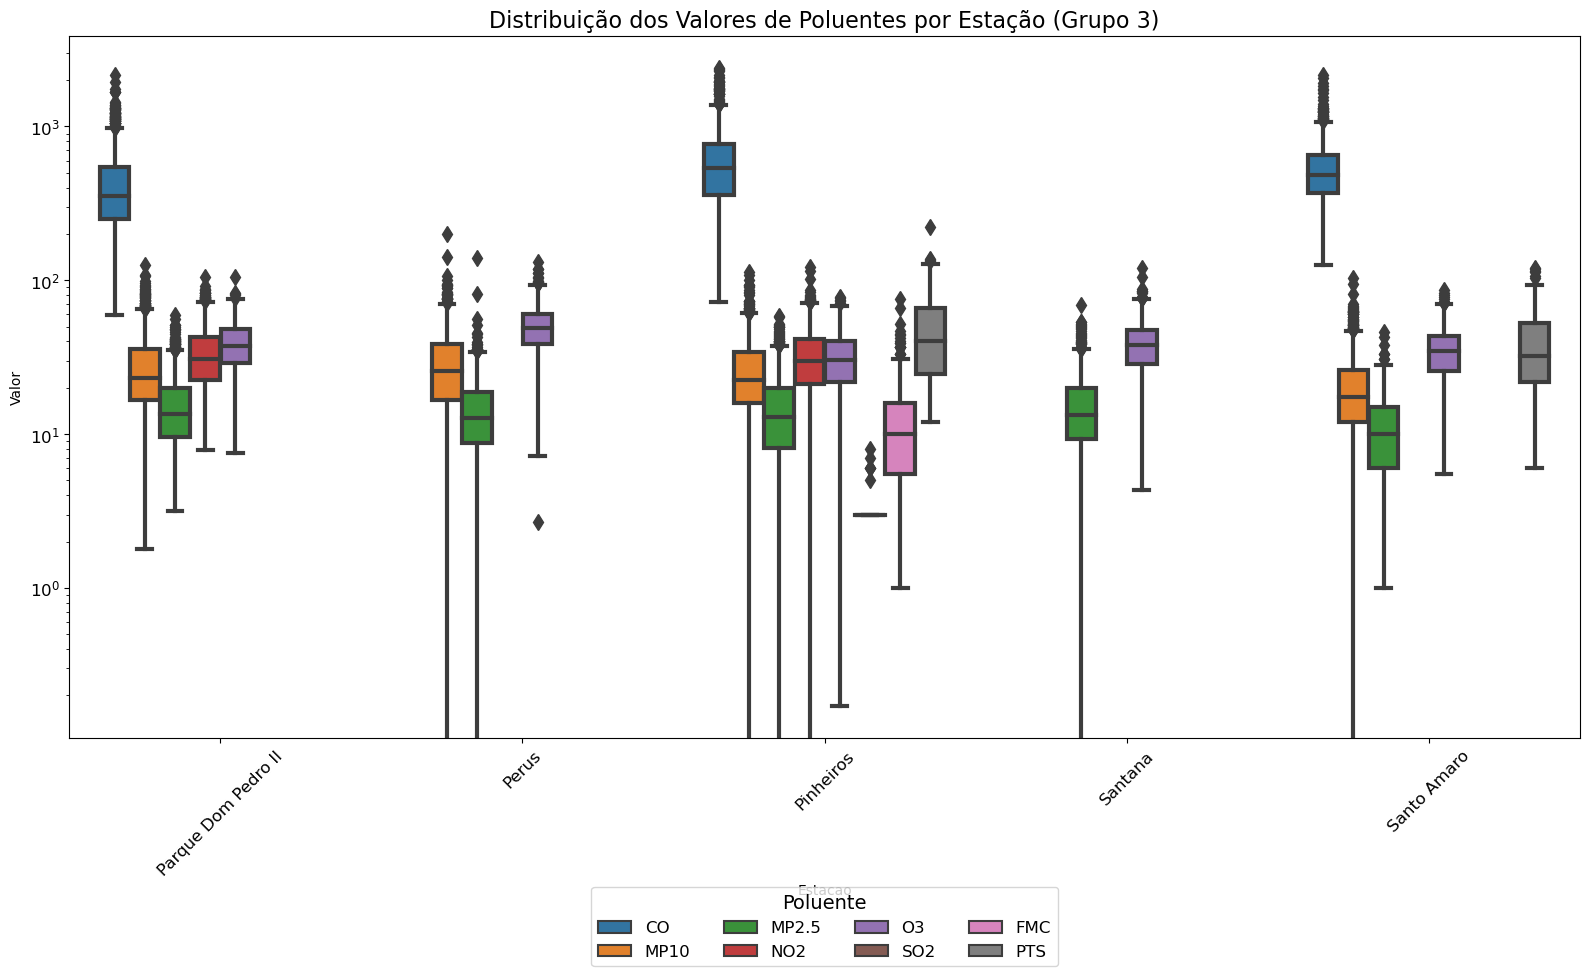

In [40]:
##  Distribuição dos valores dos poluentes em diferentes estações
# Devido ao número de Estações de medição, elas serão divididas em 3 grupos 
# e será aplicada a Escala logaritmica no eixo Y para melhorar a visualização dos dados

def plot_boxplot(estacoes_grupo, grupo_nome):
    plt.figure(figsize=(16, 10))
    sns.boxplot(data=pol_dia[pol_dia['Estacao'].isin(estacoes_grupo)], x='Estacao', y='Valor', hue='Poluente', fliersize=8, linewidth=3, width=0.8)
    plt.yscale('log')  
    plt.title(f'Distribuição dos Valores de Poluentes por Estação ({grupo_nome})', fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Poluente', bbox_to_anchor=(0.5, -0.2), loc='upper center', ncol=4, fontsize=12, title_fontsize=14)
    plt.tight_layout()
    plt.show()

estacoes = pol_dia['Estacao'].unique()
grupo1 = estacoes[:len(estacoes)//3]
grupo2 = estacoes[len(estacoes)//3:2*len(estacoes)//3]
grupo3 = estacoes[2*len(estacoes)//3:]

# Gráficos para cada grupo de estações
plot_boxplot(grupo1, 'Grupo 1')
plot_boxplot(grupo2, 'Grupo 2')
plot_boxplot(grupo3, 'Grupo 3')


In [41]:
## EAD para Séries Temporais

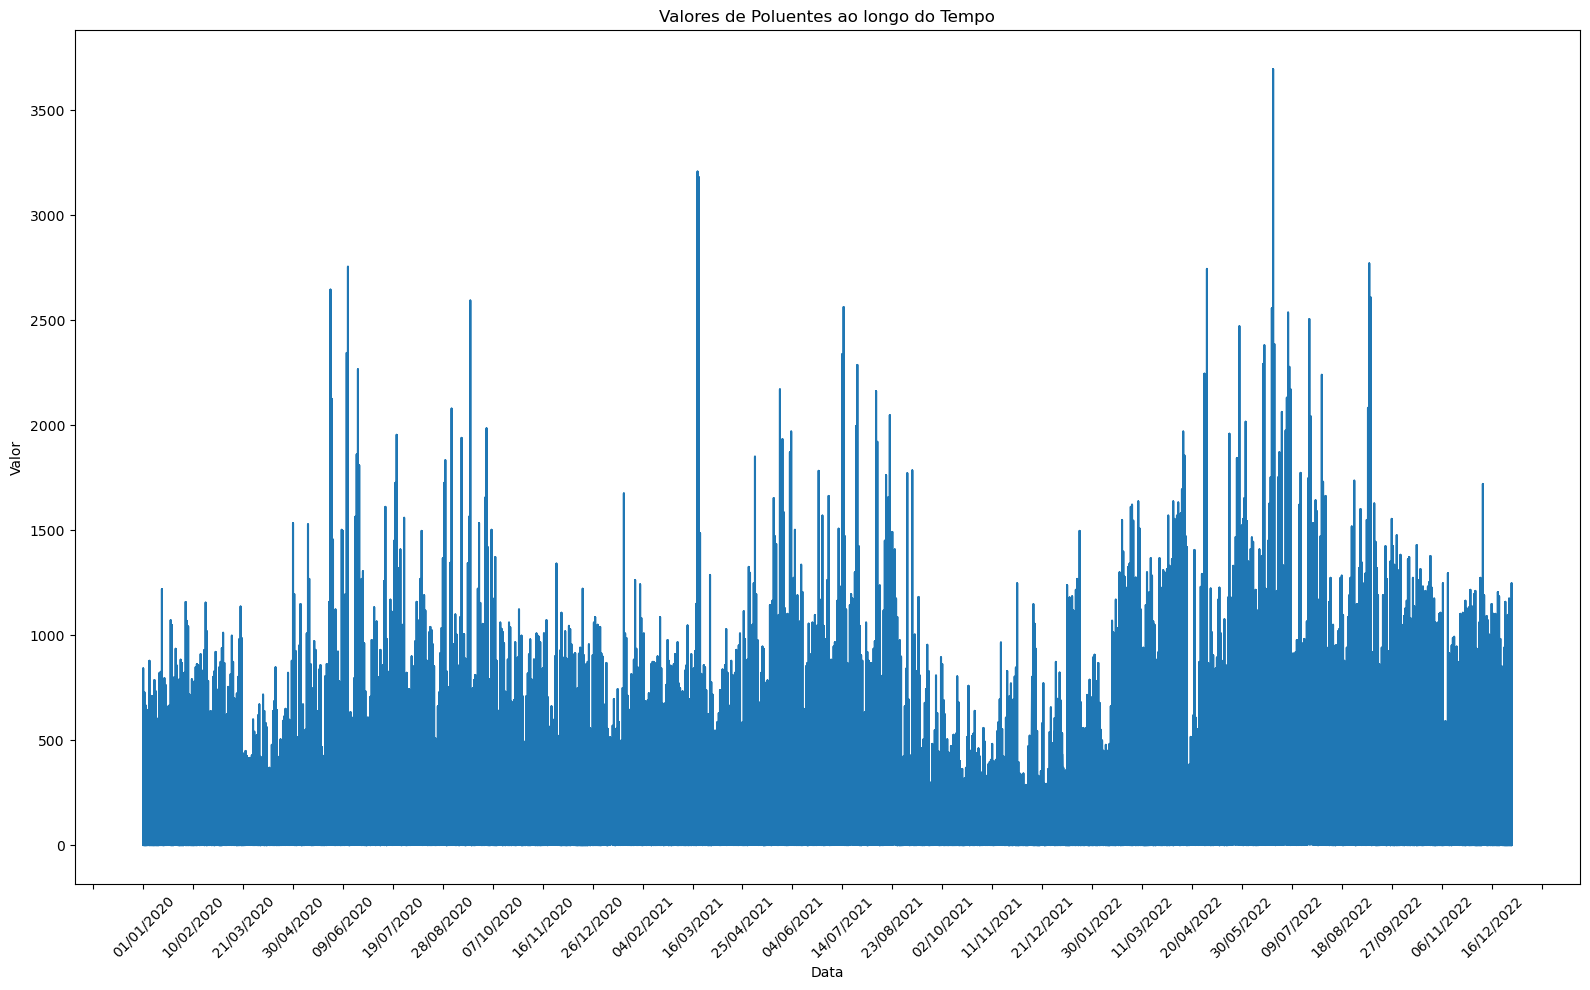

In [47]:
# Série temporal de "Valor" ao longo do tempo

import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(16, 10))

plt.plot(pol_dia['Data'], pol_dia['Valor'])
plt.title('Valores de Poluentes ao longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=40)) 
plt.tight_layout() 
plt.show()


## Decomposição da Série para verificar tendências, sazonalidadee resíduo

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


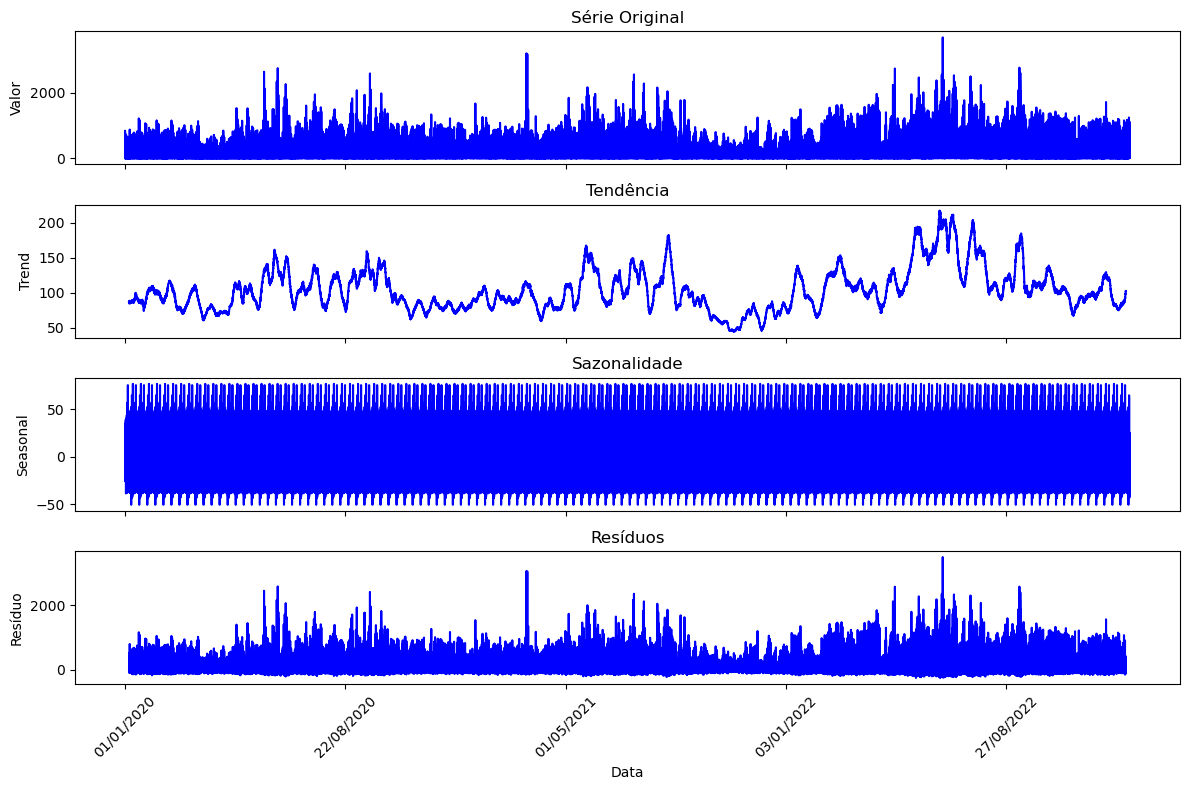

In [59]:
# Decomposição aditiva, Série original


decomposicao = seasonal_decompose(pol_dia['Valor'], model='additive', period=365)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
decomposicao.observed.plot(ax=axes[0], title='Série Original', color='blue')
axes[0].set_ylabel('Valor')

# Tendência
decomposicao.trend.plot(ax=axes[1], title='Tendência', color='blue')
axes[1].set_ylabel('Trend')

# Sazonalidade
decomposicao.seasonal.plot(ax=axes[2], title='Sazonalidade', color='blue')
axes[2].set_ylabel('Seasonal')

# Resíduos
decomposicao.resid.plot(ax=axes[3], title='Resíduos', color='blue')
axes[3].set_ylabel('Resíduo')
plt.xticks(rotation=45)  
plt.tight_layout()       
plt.show()


### O comportamento geral da série é flutuante, com alguns picos.

###  A tendência não é constante, mas flutua ao longo dos anos. Isso indica que os valores globais mudam ao longo do tempo, mas não de maneira abrupta ou linear.

###  Os dados apresentam sazonalidade forte e muito regular, o que significa que há um ciclo repetitivo nos seus dados que segue o mesmo padrão de forma consistente, os eventos se repetem com uma periodicidade curta e previsível.

### Os resíduos mostram variações bastante significativas ao longo do tempo, com alguns picos muito grandes.
Muitos dos pontos estão concentrados perto de 0, o que é bom. Isso significa que grande parte da variação foi capturada pelos componentes de tendência e sazonalidade. 
Os grandes picos nos resíduos indicam que há eventos incomuns ou anômalos que não foram capturados pelos componentes de tendência ou sazonalidade.


## Autocorrelação e autocorrelação parcial (ACF e PACF)

 Autocorrelação (ACF) e autocorrelação parcial (PACF) são úteis para verificar se há correlação entre os valores da série temporal em diferentes intervalos de tempo.

<Figure size 1200x600 with 0 Axes>

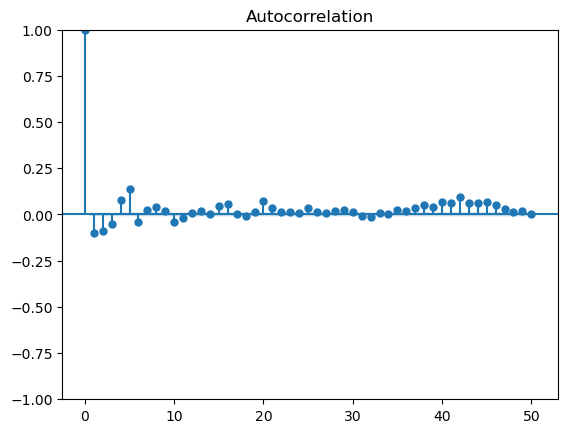

C:\Users\kika_\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

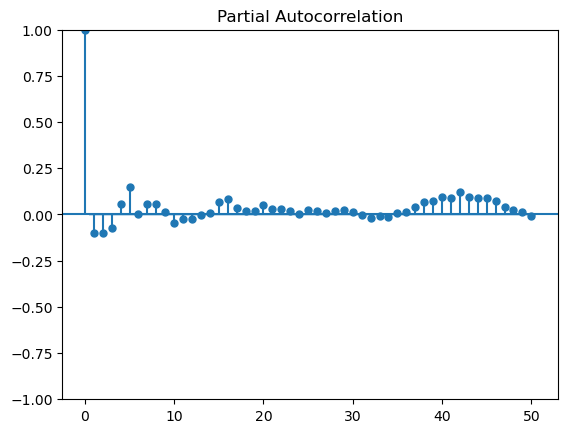

In [56]:
# ACF(Autocorrelação)

plt.figure(figsize=(12, 6))
plot_acf(pol_dia['Valor'].dropna(), lags=50)
plt.show()

# PACF(Autocorrelação Parcial)

plt.figure(figsize=(12, 6))
plot_pacf(pol_dia['Valor'].dropna(), lags=50)
plt.show()

## Teste de estacionariedade

O teste de Dickey-Fuller aumentado ajuda a determinar se os dados podem ser estacionários (a média e variância não mudam com o tempo).

Se p-value for menor que 0.05, os dados são estacionários.
ADF Statistic quanto mais negativo, maior a probabilidade de ser estacionário.

In [57]:
# Aplicando o teste de Dickey-Fuller

result = adfuller(pol_dia['Valor'].dropna())

# Exibindo os resultados
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print(f'Critical Value ({key}): {value}')

ADF Statistic: -10.663049698164935
p-value: 4.357267581721303e-19
Critical Value (1%): -3.4304935806657006
Critical Value (5%): -2.8616034595687583
Critical Value (10%): -2.566803777453456


### Podemos concluir que os dados são estacionários

## Calcular a média e variância ao longo do tempo

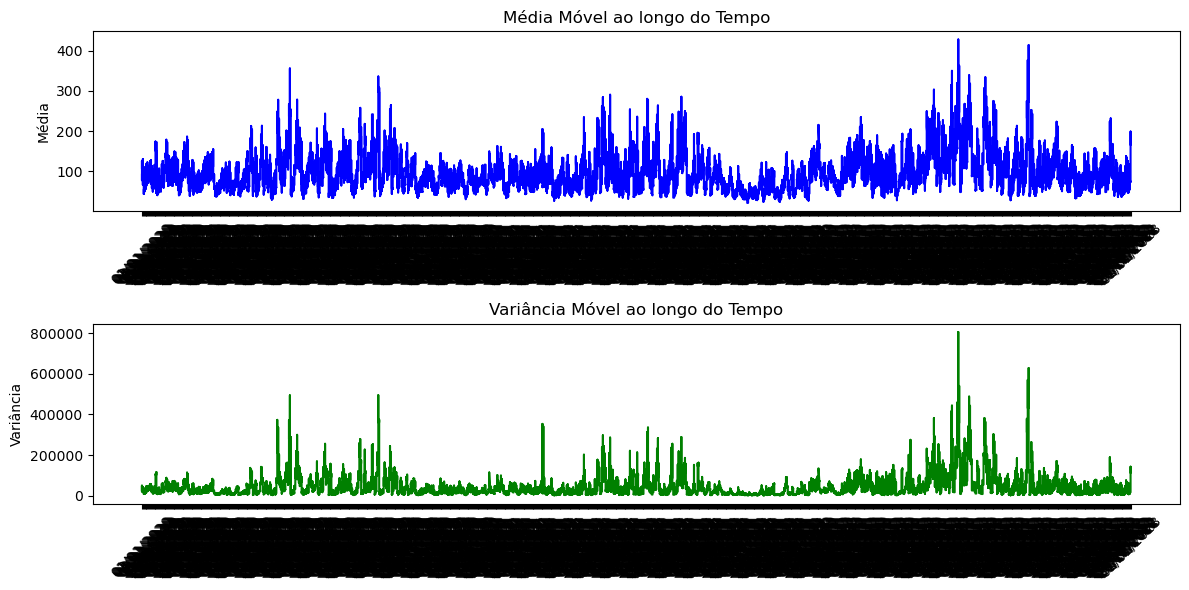

In [61]:
# Cálculo da média e variância ao longo do tempo, Média móvel e Variância móvel com janela de 30 dias

pol_dia['rolling_mean'] = pol_dia['Valor'].rolling(window=30).mean()  
pol_dia['rolling_var'] = pol_dia['Valor'].rolling(window=30).var()  


plt.figure(figsize=(12, 6))

# Média móvel
plt.subplot(2, 1, 1)
plt.plot(pol_dia.index, pol_dia['rolling_mean'], label='Média Móvel (30 dias)', color='blue')
plt.title('Média Móvel ao longo do Tempo')
plt.ylabel('Média')
plt.xticks(rotation=45)

# Variância móvel
plt.subplot(2, 1, 2)
plt.plot(pol_dia.index, pol_dia['rolling_var'], label='Variância Móvel (30 dias)', color='green')
plt.title('Variância Móvel ao longo do Tempo')
plt.ylabel('Variância')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### A variância também é não estacionária, pois varia bastante ao longo do tempo

### O gráfico mostra que a média dos valores flutua ao longo do tempo, com períodos de aumento e queda. Isso pode indicar que os dados são não estacionários, pois a média muda de forma significativa ao longo do tempo.

### Temos que analizar fatores externos ou eventos sazonais que podem estar causando estes picos.